## ML 1 In-Class

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UVADS/DS-3001/blob/main/04_ML_Concepts_I_Foundations/ML1_inclass.ipynb#scrollTo=9723a7ee)

In [7]:
# import packages

#from pydataset import data
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [11]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
import ucimlrepo
iris = fetch_ucirepo(id=53) 

X = iris.data.features 
y = iris.data.targets

#add class from y to X 
X['class'] = y['class']




What mental models can we see from these data sets? What data science questions can we ask? 

### Example: k-Nearest Neighbors

We want to first split the data into train and test data sets. To do this, we will use sklearn's train_test_split method.

First, we need to separate variables into independent and dependent dataframes.

In [12]:


train, test = train_test_split(X,  test_size=0.3, stratify = X['class']) # 70% training and 30% test, 
#stratify to ensure equal distribution of classes

In [13]:
train.describe()

,sepal length,sepal width,petal length,petal width
count,105.000000,105.000000,105.000000,105.000000
mean,5.787619,3.028571,3.744762,1.183810
std,0.816853,0.427586,1.753402,0.751936
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.400000,1.300000
75%,6.300000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


In [14]:
test, validation = train_test_split(test, test_size=0.5, stratify=test['class'])

In [15]:
test.describe()

,sepal length,sepal width,petal length,petal width
count,22.000000,22.000000,22.000000,22.000000
mean,6.218182,3.159091,4.031818,1.295455
std,0.958489,0.391163,1.940885,0.835223
min,4.800000,2.500000,1.200000,0.100000
25%,5.450000,2.900000,1.625000,0.425000
50%,6.400000,3.100000,4.550000,1.400000
75%,6.775000,3.275000,5.475000,2.075000
max,7.900000,4.000000,6.700000,2.500000


Now, we use the scikitlearn KNN classifier.

In [16]:
validation.describe()

,sepal length,sepal width,petal length,petal width
count,23.000000,23.000000,23.00000,23.000000
mean,5.739130,3.069565,3.56087,1.173913
std,0.667927,0.498575,1.68489,0.771196
min,4.900000,2.300000,1.20000,0.200000
25%,5.100000,2.700000,1.55000,0.300000
50%,5.800000,3.000000,4.00000,1.300000
75%,6.300000,3.450000,5.00000,1.600000
max,7.200000,4.200000,6.10000,2.500000


In [18]:
neigh = KNeighborsClassifier(n_neighbors=10)

X_train = train.drop(['class'], axis=1).values # values
y_train = train['class'].values # labels

neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### Another Example with a Decision Tree

In [19]:
# train a decision tree model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [20]:
X_test = test.drop(['class'], axis=1).values
y_test = test['class'].values

dt = clf.predict(X_test)

print("Predicted label Versicolor =",(dt == 'Iris-versicolor').sum())
print("Predicted label Virginica =", (dt == 'Iris-virginica').sum())
print("Predicted label Setosa =", (dt == 'Iris-setosa').sum())

Predicted label Versicolor = 7
Predicted label Virginica = 8
Predicted label Setosa = 7


In [21]:
print("True Label Versicolor =",(y_test == 'Iris-versicolor').sum())
print("True Label Virginica =", (y_test == 'Iris-virginica').sum())
print("True Label Setosa =", (y_test == 'Iris-setosa').sum())

True Label Versicolor = 7
True Label Virginica = 8
True Label Setosa = 7


In [22]:
import sklearn

sklearn.metrics.confusion_matrix(y_test, dt,labels=['Iris-versicolor','Iris-virginica','Iris-setosa'], 
                                 sample_weight=None, normalize=None)

array([[7, 0, 0],
       [0, 8, 0],
       [0, 0, 7]])

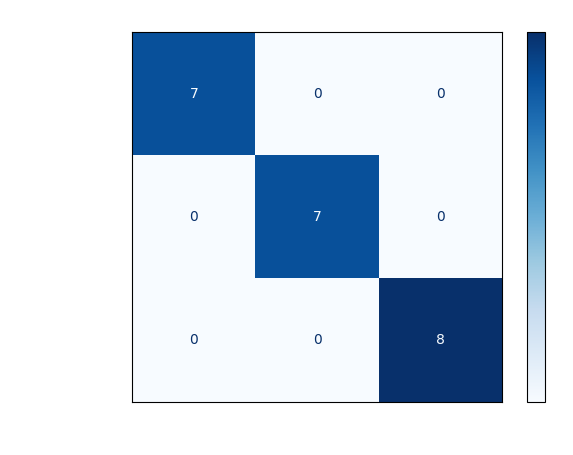

In [24]:
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
 
color = 'white'
#matrix = plot_confusion_matrix(neigh, X_test, y_test, cmap=plt.cm.Blues)
matrix = ConfusionMatrixDisplay.from_estimator(neigh, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()


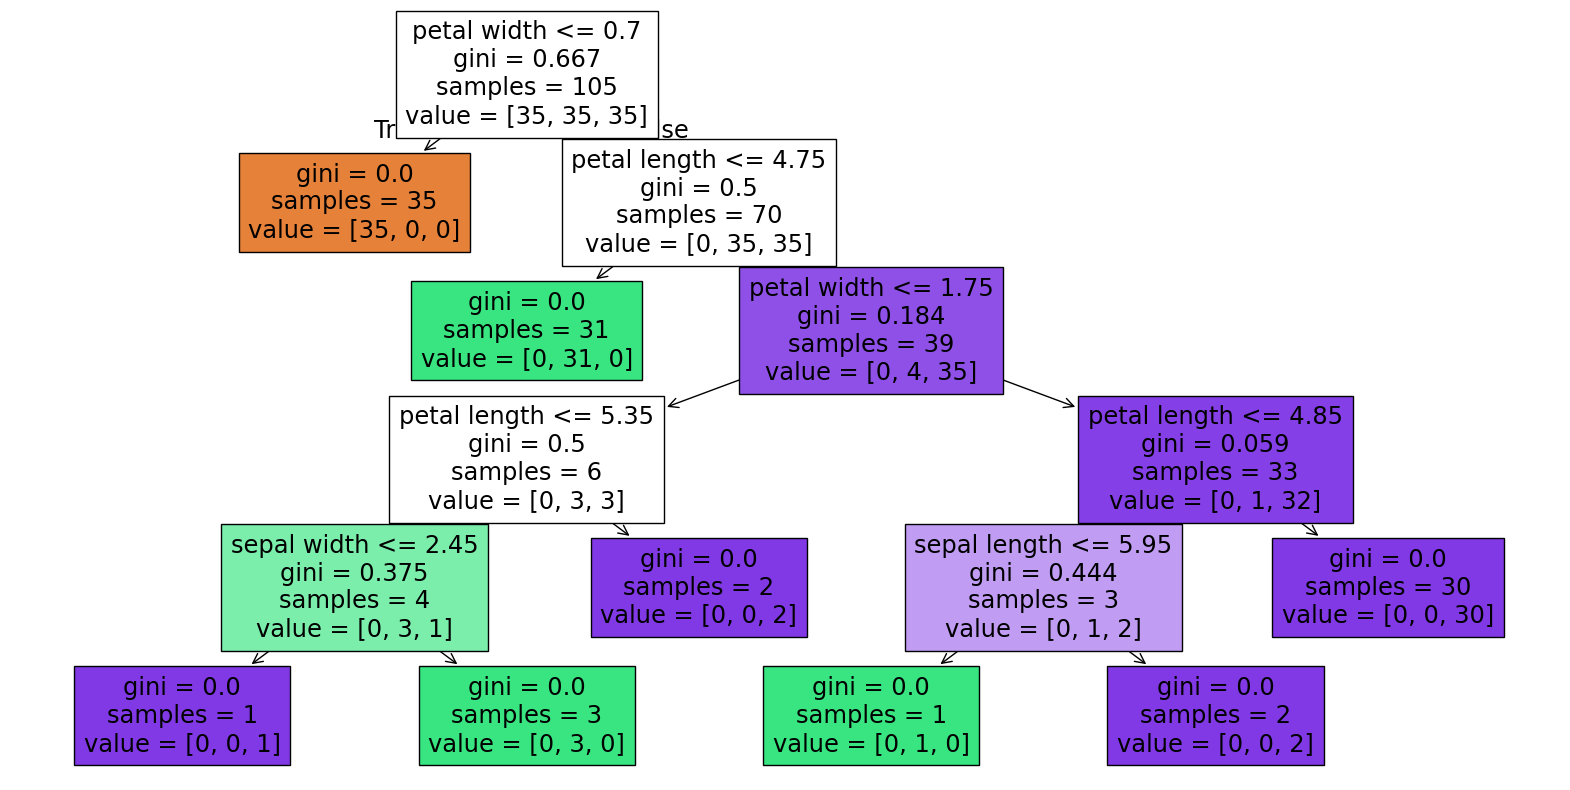

In [27]:
# print out decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=train.columns)
plt.show()


### Patterns in data

Look at the following tables: do you see any patterns? How could a classification model point these out?

In [31]:
patterns = X.groupby(['class'])
patterns['sepal length'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [32]:
patterns['sepal width'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [33]:
patterns['petal length'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,1.464,0.173511,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [34]:

fig = px.scatter_3d(X, x = 'sepal length', 
                     y = 'petal length', z='petal width', color = 'class')

fig

#fig.show(renderer='browser')

### Mild disclaimer --
*Do not worry about understanding the machine learning in this example!* We go over kNN models at length later in the course; you do not need to understand exactly what the model is doing quite yet. For now, ask yourself:

1. What is the purpose of data splitting?
2. What can we learn from data testing/validation?
3. How do we know if a model is working?
4. How could we find the model error?

If you want, try changing the size of the test data or the number of n_neighbors and see what changes!